# NumerAI

NumerAI is a hedgefund driven by data scientists. It provides anonymized equity data in hopes that participants build models on that data that accurately predicts an equity's performance. NumerAI attempts to monetize by using an ensemble of user-submitted models, and pays their users proportionally to their models role in the ensemble.

In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
trainDF=pd.read_csv('Data/Sept20/numerai_training_data.csv', header=0)

In [32]:
trainDF.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
0,n5e99b4326e6f463,era1,train,0.64488,0.56167,0.72591,0.52219,0.49311,0.51511,0.45514,...,0.67751,0.43340,0.67009,0.50086,0.51208,0.58674,0.54358,0.58602,0.51818,0
1,ncf8fb21f31e74d8,era1,train,0.44203,0.42957,0.51861,0.38445,0.62049,0.49168,0.46444,...,0.44734,0.47049,0.50980,0.57241,0.38253,0.52020,0.55781,0.55142,0.51869,1
2,n834cd2712b7e479,era1,train,0.36741,0.43188,0.52491,0.44392,0.52592,0.50014,0.32131,...,0.39102,0.71896,0.57458,0.50981,0.52993,0.53588,0.52843,0.50573,0.38799,1
3,nf49d82d23f17475,era1,train,0.80707,0.56341,0.52526,0.66020,0.34807,0.64373,0.68063,...,0.54288,0.39457,0.61531,0.30979,0.51926,0.44679,0.45668,0.66750,0.60906,1
4,n7586ede71dd04e7,era1,train,0.35577,0.57219,0.61766,0.42305,0.49314,0.49894,0.61066,...,0.48323,0.56839,0.59356,0.41716,0.51963,0.48346,0.52642,0.47278,0.43362,1


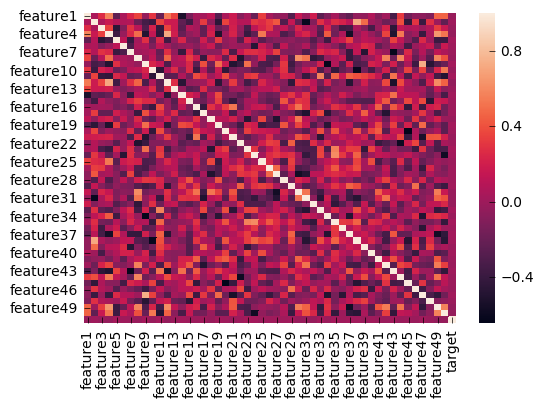

In [33]:
sns.heatmap(trainDF.corr())

Since all features are anonymous, intuition won't go very far for feature selection. Instead, I'm going to use Principle Component Analysis to reduce the number of features and the correlation between them. NumerAI uses Log Loss as their error metric, which heavily penalizes error. Therefore, although this seems like a classification problem, regression will yield drastically lower Log Loss. Therefore, as a baseline, I'll use Multiple Linear Regression. PCA and Linear Regression can be combined into a pipeline to allow the easy transformation of test data.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
pipe = Pipeline([('Principle Component Analysis', PCA()), ('Linear Regression', LinearRegression())])

In [35]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split( trainDF.drop(['id', 'era', 'data_type','target'], axis = 1 ),  trainDF['target'], test_size=0.3)

In [36]:
pipe.fit(xTrain, yTrain)
predictions=pipe.predict(xTest)

NumerAI uses Log Loss as their error metric, so I'll do the same.

In [37]:
from sklearn.metrics import log_loss
print(log_loss(yTest, predictions))

0.691756324013


## Submit

In [38]:
testDF=pd.read_csv('Data/Sept20/numerai_tournament_data.csv', header=0)

In [41]:
tournamentPredictions=pipe.predict(testDF.drop(['id', 'era', 'data_type','target'], axis = 1 ))

In [42]:
results=pd.concat([testDF['id'], pd.Series(tournamentPredictions)], axis=1, keys=['id', 'probability'])

In [43]:
results.to_csv('submission.csv', index=False)

## Next Steps

* Experiment with t-SNE over PCA
* Test additional models
* Build an ensemble